In [63]:
import cv2
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import random

In [64]:
img = cv2.imread('images/mrbean.JPG', 0)

row, col = img.shape

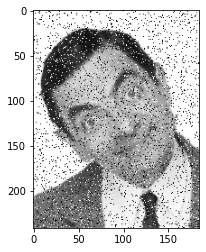

In [65]:
for i in range(row):
    for j in range(col):
        noise = random.randint(0, row-1)
        if noise % (row//30) == 0:
            img[i, j] = random.choice([0, 255])

cv2.imwrite('output/3A.jpg', img)
plt.imshow(img, cmap='gray')

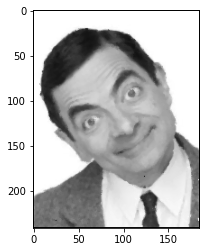

In [66]:
result = np.zeros((row, col))

for i in range(1, row-1):
    for j in range(1, col-1):
        small_img = img[i-1:i+2, j-1:j+2]
        small_img_1d = small_img.reshape(9)
        small_img_1d_sorted = np.sort(small_img_1d)
        result[i, j] = small_img_1d_sorted[4]

cv2.imwrite('output/3B.jpg', result)        
plt.imshow(result, cmap='gray')

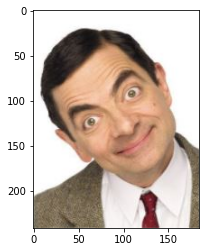

In [67]:
img = plt.imread('images/mrbean.JPG')
plt.imshow(img)
plt.show()

In [68]:
face_detector = MTCNN()

In [69]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

In [70]:
results = face_detector.detect_faces(img)

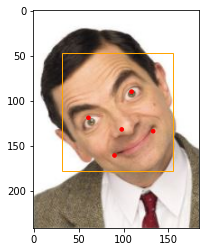

In [71]:
draw_facebox_and_keypoints('images/mrbean.JPG', results)

In [72]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [73]:
def alignment_procedure(img, left_eye, right_eye):

    #this function aligns given face in img based on left and right eye coordinates

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    #-----------------------
    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #-----------------------
    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #-----------------------

    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #-----------------------
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    #-----------------------

    return img #return img anyway

In [74]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)

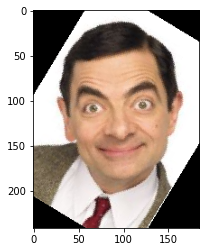

In [78]:
cv2.imwrite('output/3C.jpg',cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)